In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv')

df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
df = df.drop(columns=['name', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 71.7+ KB


In [8]:
df.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
dtype: int64

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>],
       [<Axes: title={'center': 'body'}>, <Axes: >, <Axes: >]],
      dtype=object)

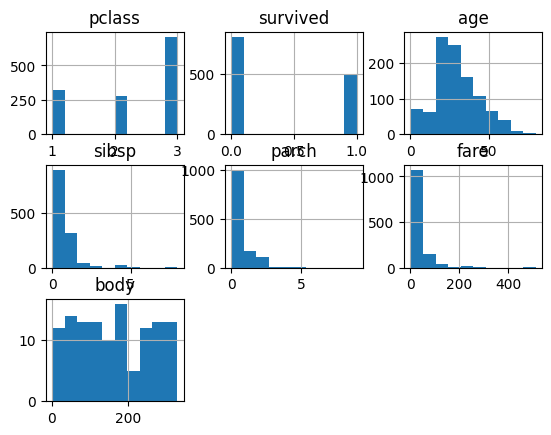

In [17]:
df.hist()

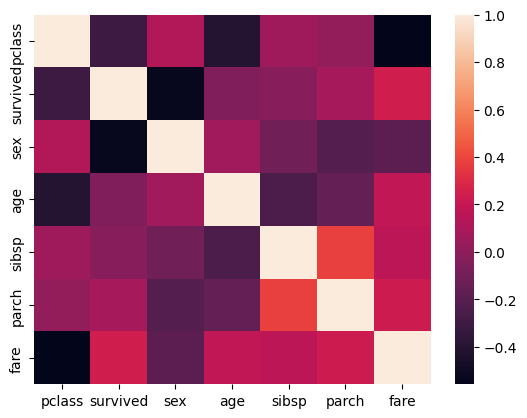

In [15]:
sns.heatmap(df.corr())
plt.show()

/opt/anaconda3/envs/boost_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/lq/6p6h80md1hz1tsd5xpsj4tmw0000gn/T/ipykernel_45181/3901852926.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/var/folders/lq/6p6h80md1hz1tsd5xpsj4tmw0000gn/T/ipykernel_45181/3901852926.py:18: Futur

Сравнение методов разделения данных:

Обычное разделение:
Accuracy: 0.7862595419847328
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       144
           1       0.82      0.67      0.74       118

    accuracy                           0.79       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.79      0.79      0.78       262


Стратифицированное разделение:
Accuracy: 0.8206106870229007
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       162
           1       0.78      0.73      0.76       100

    accuracy                           0.82       262
   macro avg       0.81      0.80      0.81       262
weighted avg       0.82      0.82      0.82       262


Сравнение классификаторов:

CatBoost:
Accuracy: 0.8206106870229007
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       162
           1       0.

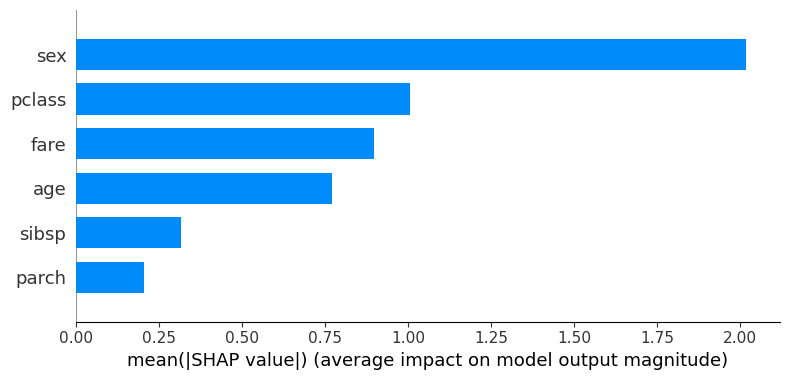

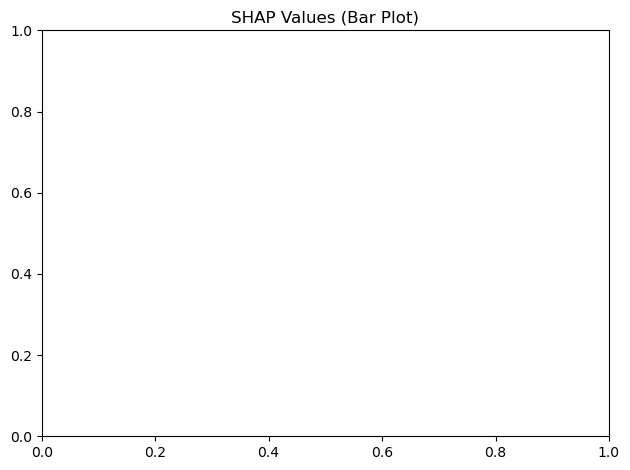

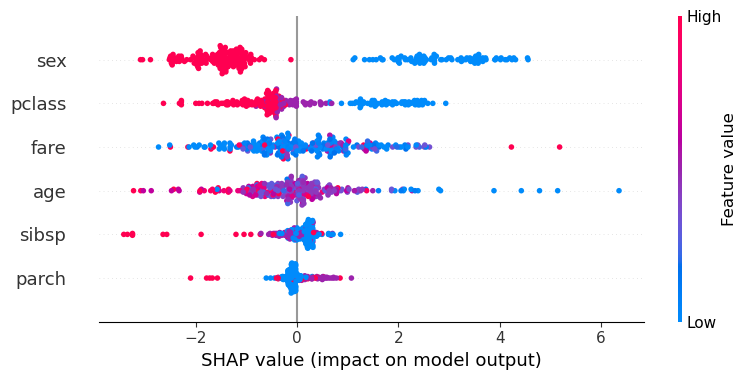

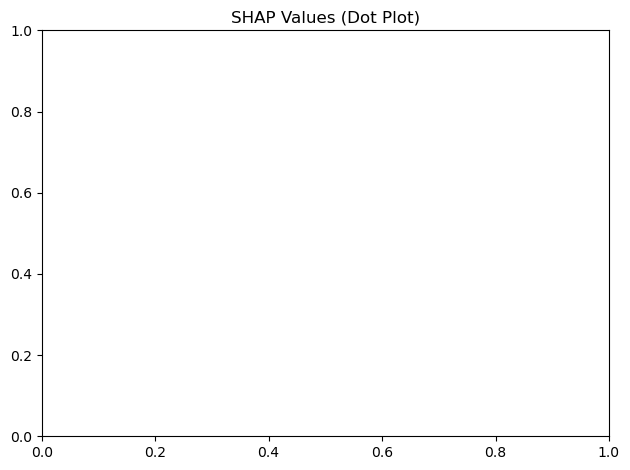

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import shap

# Загрузка данных
df = pd.read_csv('https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv')

# Предобработка данных
df = df.drop(columns=['name', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest', 'body'])
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# Разделение на признаки и целевую переменную
X = df.drop('survived', axis=1)
y = df['survived']

# Функция для обучения и оценки модели
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, classification_report(y_test, y_pred)

# Сравнение методов разделения данных
print("Сравнение методов разделения данных:")

# Обычное разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=0)
accuracy, report = train_and_evaluate(model, X_train, X_test, y_train, y_test)
print("\nОбычное разделение:")
print(f"Accuracy: {accuracy}")
print(report)

# Стратифицированное разделение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=0)
accuracy, report = train_and_evaluate(model, X_train, X_test, y_train, y_test)
print("\nСтратифицированное разделение:")
print(f"Accuracy: {accuracy}")
print(report)

# Сравнение классификаторов
print("\nСравнение классификаторов:")

# CatBoost
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=0)
accuracy, report = train_and_evaluate(catboost_model, X_train, X_test, y_train, y_test)
print("\nCatBoost:")
print(f"Accuracy: {accuracy}")
print(report)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
accuracy, report = train_and_evaluate(rf_model, X_train, X_test, y_train, y_test)
print("\nRandom Forest:")
print(f"Accuracy: {accuracy}")
print(report)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
accuracy, report = train_and_evaluate(lr_model, X_train, X_test, y_train, y_test)
print("\nLogistic Regression:")
print(f"Accuracy: {accuracy}")
print(report)

# SHAP values для CatBoost
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

# Визуализация SHAP values
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("SHAP Values (Bar Plot)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Values (Dot Plot)")
plt.tight_layout()
plt.show()


Using Simple Split:

Random Forest:
Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.7900763358778626
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       144
           1       0.83      0.67      0.74       118

    accuracy                           0.79       262
   macro avg       0.80      0.78      0.78       262
weighted avg       0.80      0.79      0.79       262



<Figure size 1000x600 with 0 Axes>

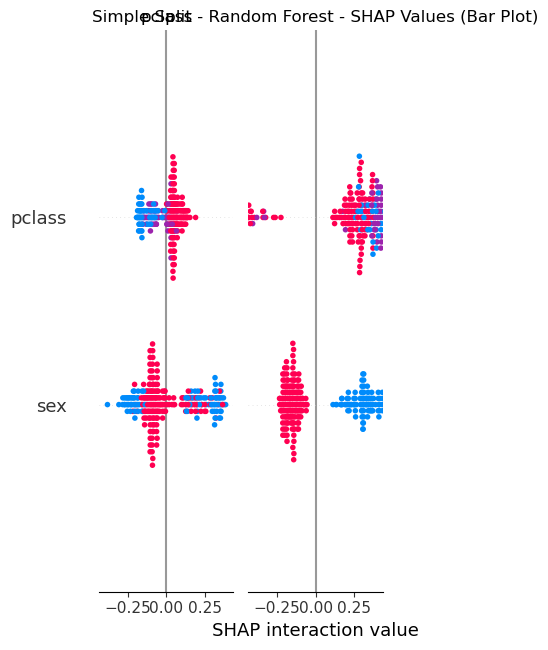

<Figure size 1000x600 with 0 Axes>

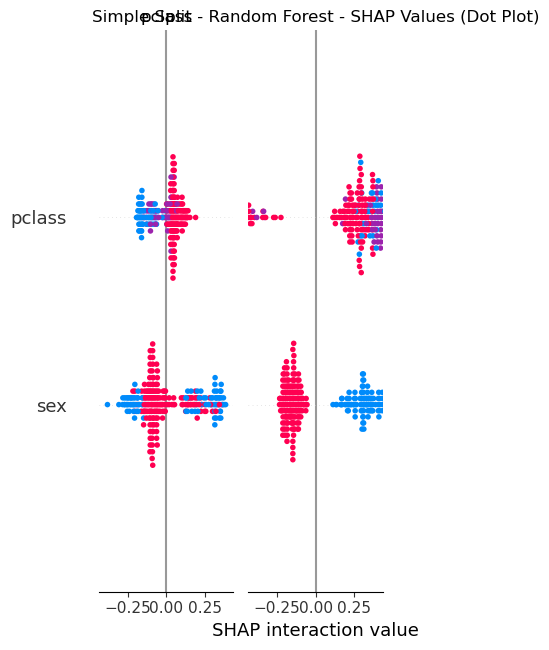


Logistic Regression:
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7709923664122137
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.82      0.64      0.71       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.76       262
weighted avg       0.78      0.77      0.77       262



InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import shap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv')

# Предобработка данных
df = df.drop(columns=['name', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest', 'body'])
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

# Разделение на признаки и целевую переменную
X = df.drop('survived', axis=1)
y = df['survived']

# Масштабирование числовых признаков
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Функция для обучения и оценки модели
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, classification_report(y_test, y_pred)

# Функция для визуализации SHAP values
def plot_shap_values(model, X_test, title):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    plt.title(f"{title} - SHAP Values (Bar Plot)")
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_test, show=False)
    plt.title(f"{title} - SHAP Values (Dot Plot)")
    plt.tight_layout()
    plt.show()

# Словарь с классификаторами и их параметрами для GridSearchCV
classifiers = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }),
    'CatBoost': (CatBoostClassifier(verbose=0), {
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1],
        'depth': [4, 6, 8]
    })
}

# Методы разбиения данных
split_methods = {
    'Simple Split': lambda X, y: train_test_split(X, y, test_size=0.2, random_state=42),
    'Stratified Split': lambda X, y: train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
}

results = []

for split_name, split_method in split_methods.items():
    print(f"\nUsing {split_name}:")
    X_train, X_test, y_train, y_test = split_method(X_scaled, y)
    
    for clf_name, (clf, params) in classifiers.items():
        grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        accuracy, report = train_and_evaluate(best_model, X_train, X_test, y_train, y_test)
        
        print(f"\n{clf_name}:")
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Accuracy: {accuracy}")
        print("Classification Report:")
        print(report)
        
        results.append({
            'Split Method': split_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'Best Parameters': grid_search.best_params_
        })
        
        plot_shap_values(best_model, X_test, f"{split_name} - {clf_name}")

# Визуализация результатов
results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))
sns.barplot(x='Classifier', y='Accuracy', hue='Split Method', data=results_df)
plt.title('Comparison of Classifiers and Split Methods')
plt.ylim(0.7, 0.9)  # Установите пределы по оси y в соответствии с вашими результатами
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Вывод лучшей модели
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model:")
print(f"Split Method: {best_model['Split Method']}")
print(f"Classifier: {best_model['Classifier']}")
print(f"Accuracy: {best_model['Accuracy']}")
print(f"Best Parameters: {best_model['Best Parameters']}")

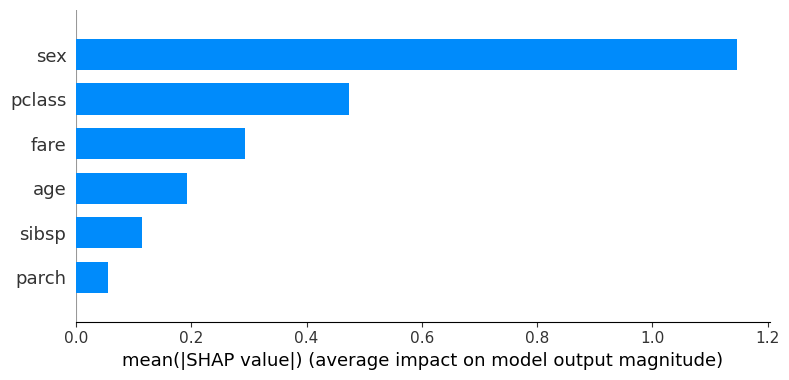

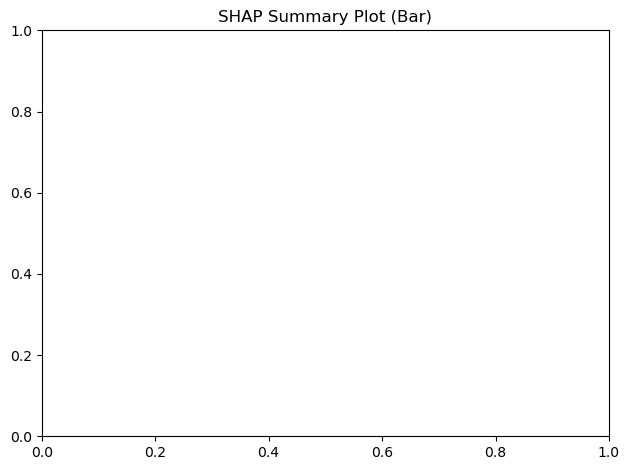

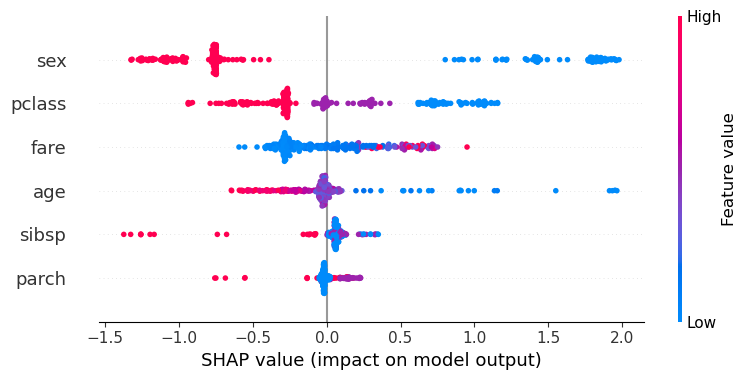

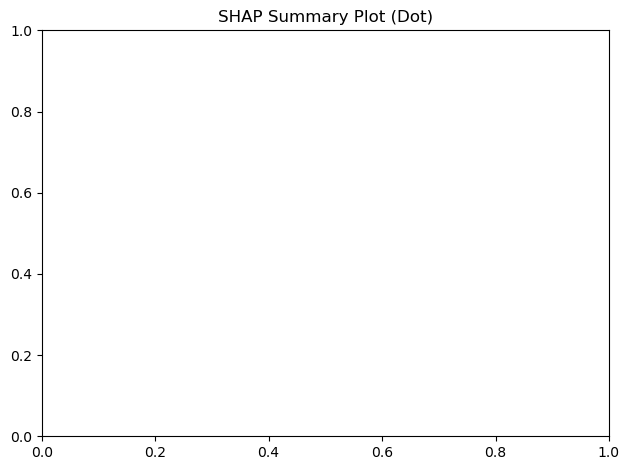

IndexError: index 5 is out of bounds for axis 1 with size 1

<Figure size 1000x600 with 0 Axes>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import shap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv')

# Предобработка данных
df = df.drop(columns=['name', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest', 'body'])
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

# Разделение на признаки и целевую переменную
X = df.drop('survived', axis=1)
y = df['survived']

# Масштабирование числовых признаков
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Обучение CatBoost модели
model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, random_state=42, verbose=0)
model.fit(X_train, y_train)

# Создание объекта SHAP explainer
explainer = shap.TreeExplainer(model)

# Вычисление SHAP values
shap_values = explainer.shap_values(X_test)

# 1. Summary Plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("SHAP Summary Plot (Bar)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot (Dot)")
plt.tight_layout()
plt.show()

# 2. Dependence Plot для нескольких важных признаков
important_features = ["fare", "age", "sex"]
for feature in important_features:
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(feature, shap_values[1], X_test)
    plt.title(f"SHAP Dependence Plot for {feature}")
    plt.tight_layout()
    plt.show()

# 3. Force Plot для отдельных предсказаний
plt.figure(figsize=(20, 3))
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:], show=False, matplotlib=True)
plt.title("SHAP Force Plot for Single Prediction")
plt.tight_layout()
plt.show()

# 4. Decision Plot
plt.figure(figsize=(10, 8))
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test)
plt.title("SHAP Decision Plot")
plt.tight_layout()
plt.show()

# 5. Waterfall Plot для отдельного предсказания
plt.figure(figsize=(10, 8))
shap.plots.waterfall(shap.Explanation(values=shap_values[1][0], base_values=explainer.expected_value[1], data=X_test.iloc[0], feature_names=X_test.columns))
plt.title("SHAP Waterfall Plot for Single Prediction")
plt.tight_layout()
plt.show()

# 6. Beeswarm Plot
plt.figure(figsize=(10, 8))
shap.plots.beeswarm(shap.Explanation(values=shap_values[1], base_values=explainer.expected_value[1], data=X_test, feature_names=X_test.columns))
plt.title("SHAP Beeswarm Plot")
plt.tight_layout()
plt.show()

# 7. Heatmap
plt.figure(figsize=(12, 8))
shap.plots.heatmap(shap.Explanation(values=shap_values[1], base_values=explainer.expected_value[1], data=X_test, feature_names=X_test.columns))
plt.title("SHAP Heatmap")
plt.tight_layout()
plt.show()

# 8. Взаимодействие признаков
interaction_values = explainer.shap_interaction_values(X_test)
plt.figure(figsize=(12, 8))
shap.summary_plot(interaction_values[1], X_test)
plt.title("SHAP Interaction Values")
plt.tight_layout()
plt.show()

# 9. Важность признаков на основе SHAP
feature_importance = pd.DataFrame(list(zip(X_test.columns, np.abs(shap_values[1]).mean(0))), 
                                  columns=['feature', 'feature_importance_vals'])
feature_importance = feature_importance.sort_values(by=['feature_importance_vals'], ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='feature_importance_vals', y='feature', data=feature_importance)
plt.title("Feature Importance based on SHAP Values")
plt.tight_layout()
plt.show()

# 10. Распределение SHAP values для каждого класса
plt.figure(figsize=(12, 6))
shap.plots.violin(shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test, feature_names=X_test.columns))
plt.title("Distribution of SHAP Values for Each Class")
plt.tight_layout()
plt.show()

print("Анализ SHAP values завершен. Проверьте все графики для полного понимания влияния признаков на предсказания модели.")

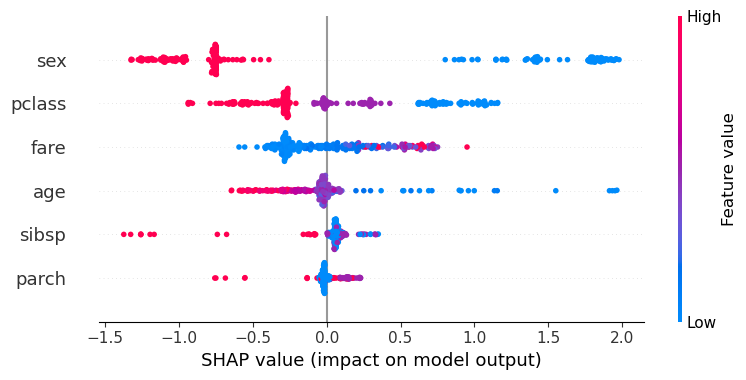

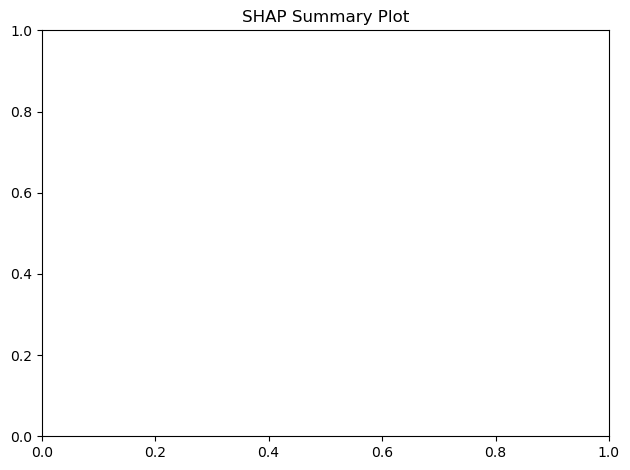

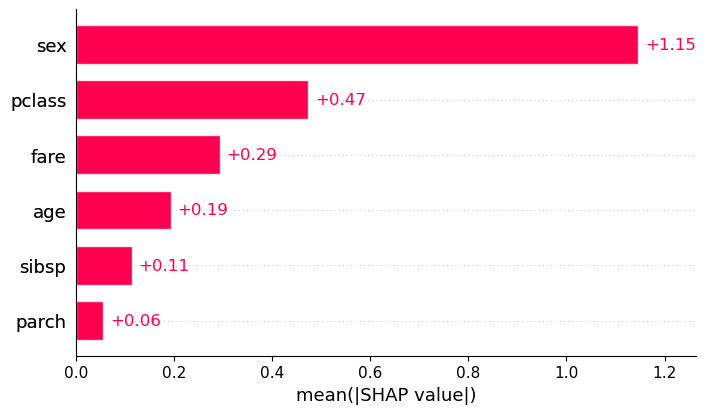

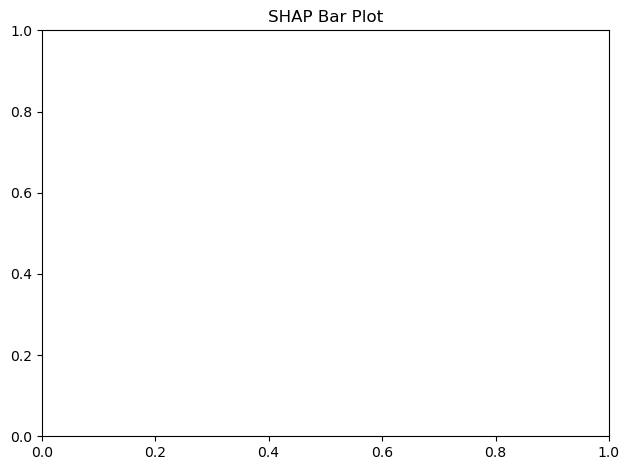

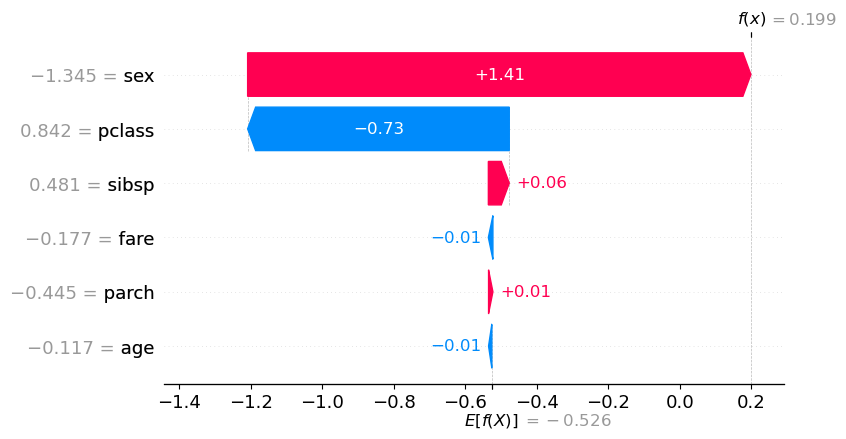

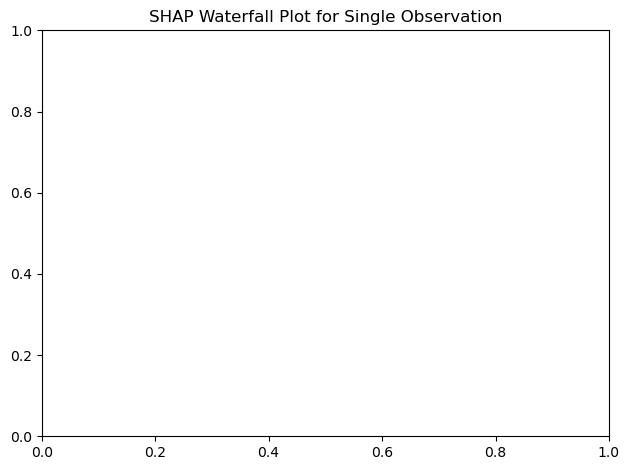

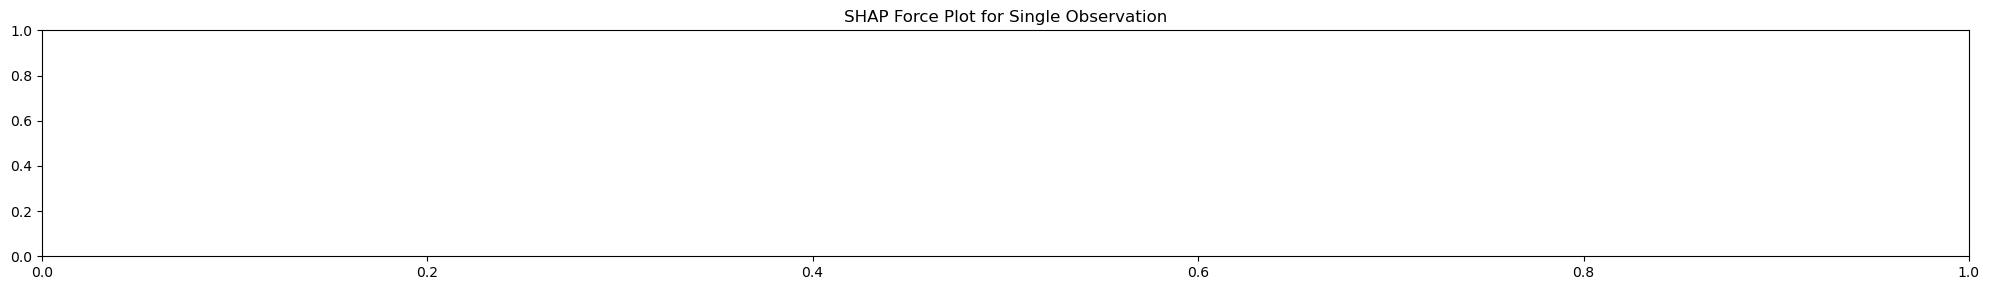

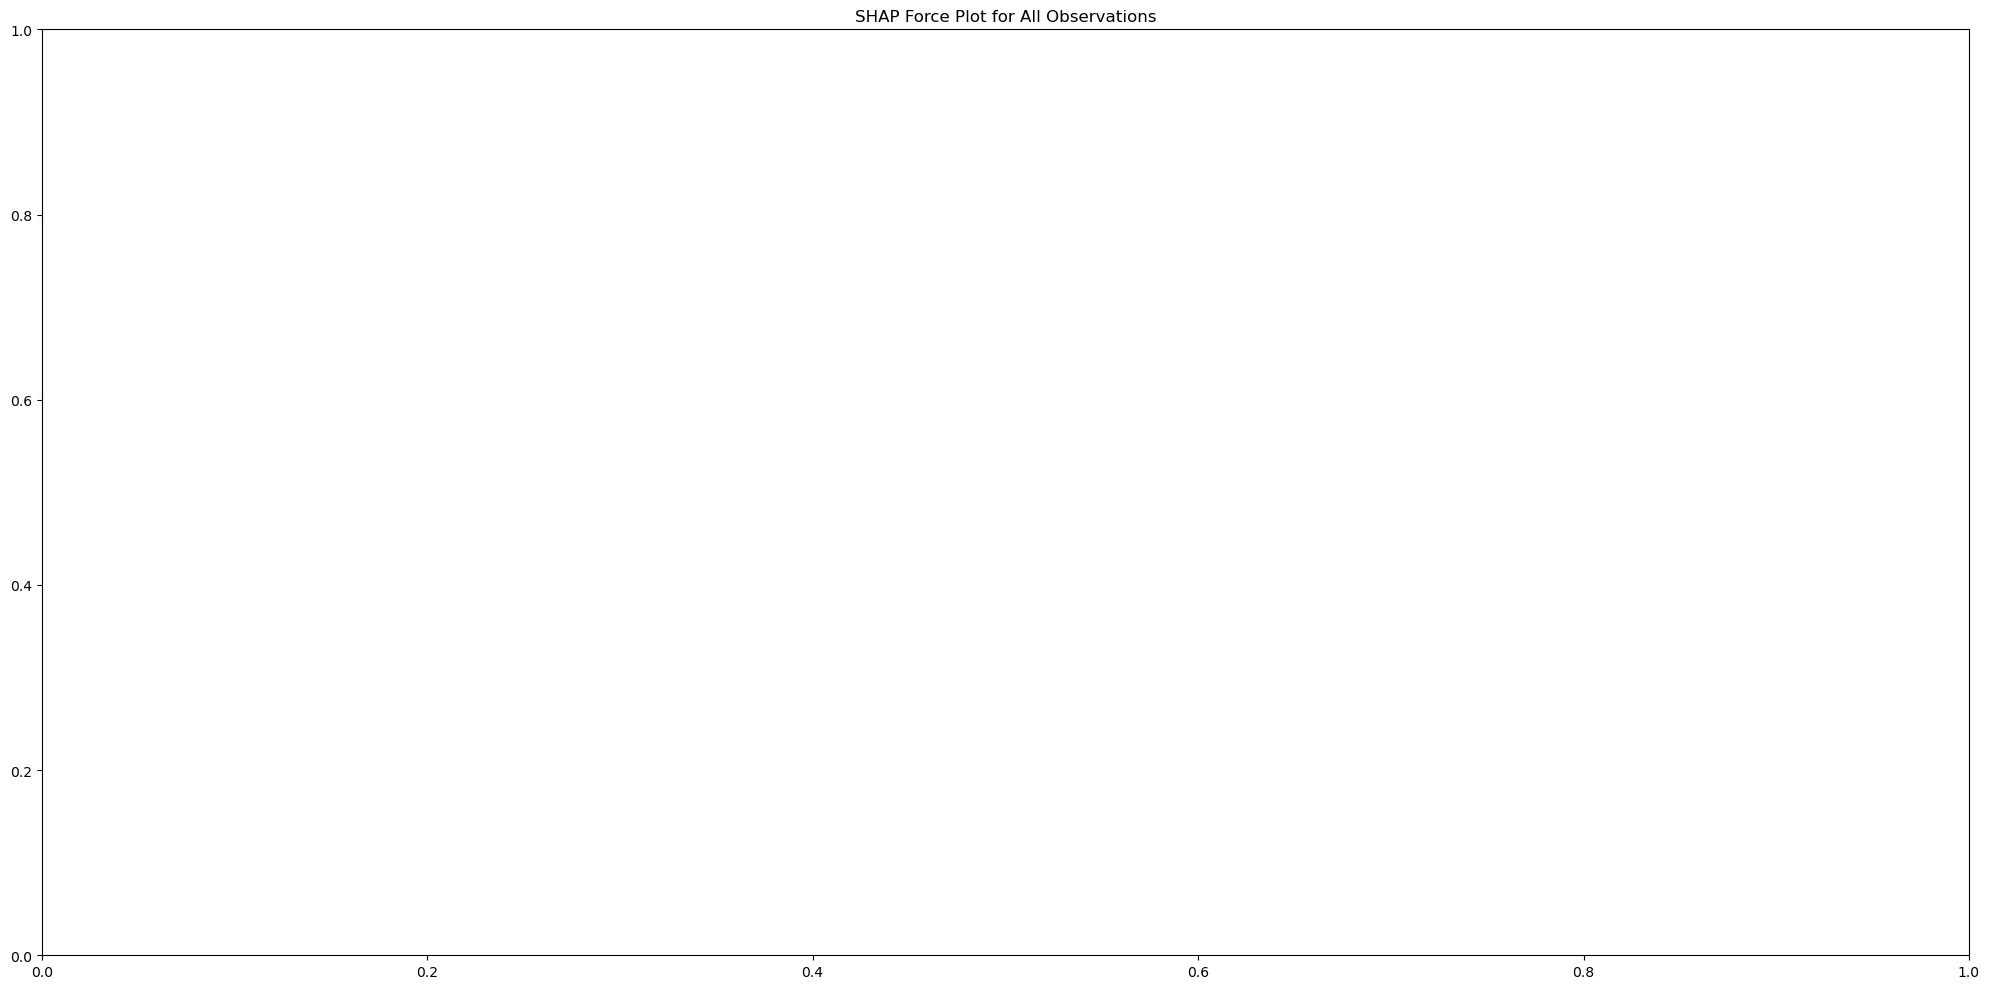

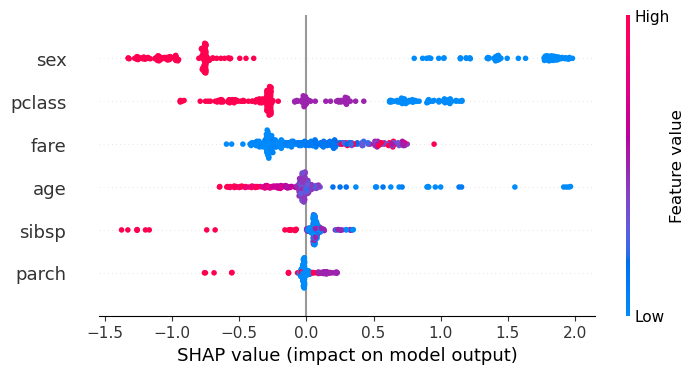

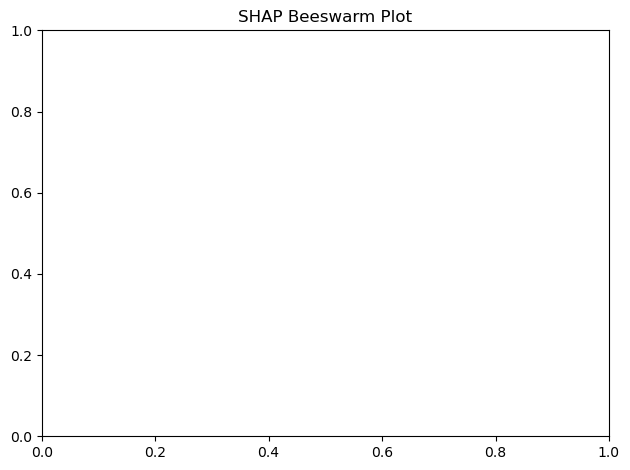

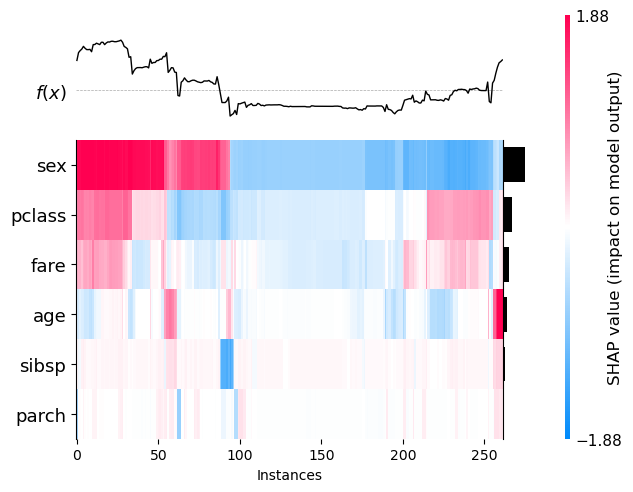

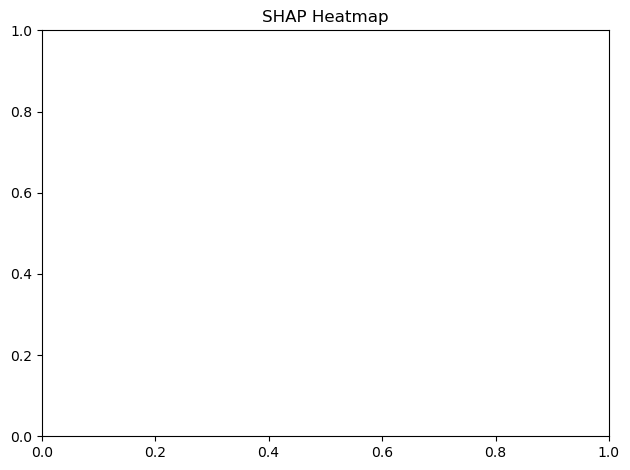

<Figure size 1000x600 with 0 Axes>

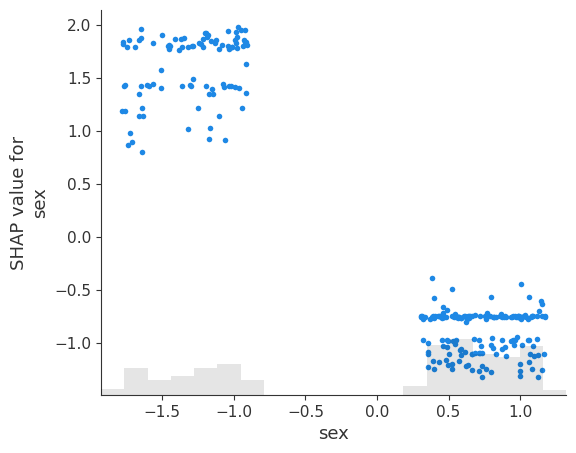

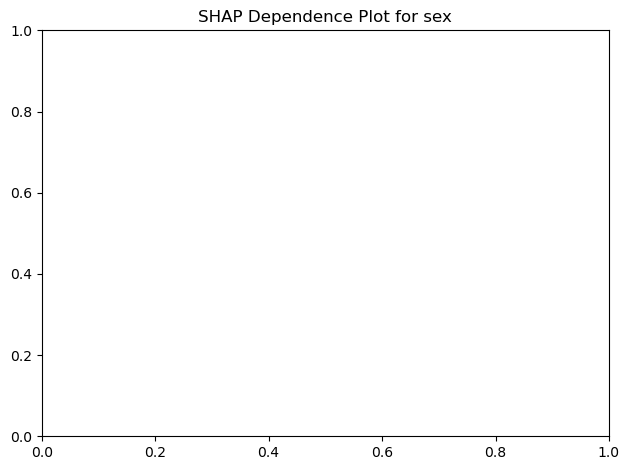

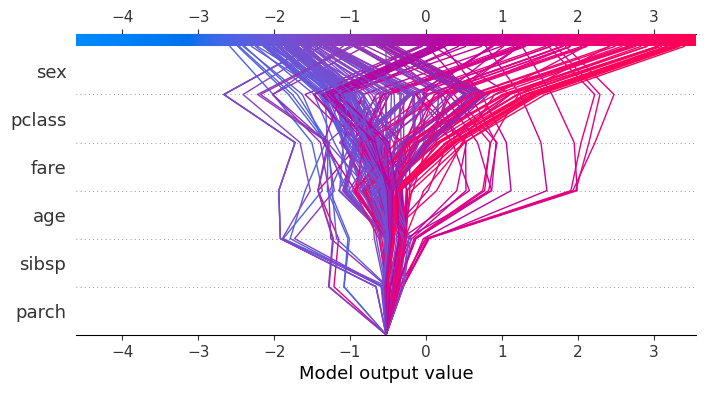

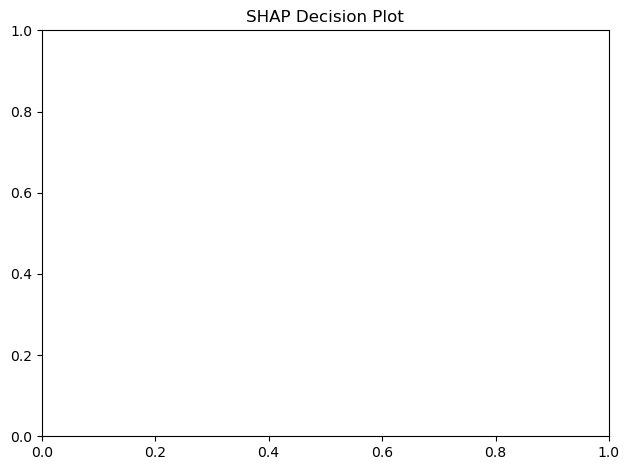

Визуализации SHAP values завершены. Проанализируйте графики для понимания влияния признаков на предсказания модели.


In [6]:
import shap
import matplotlib.pyplot as plt

# Предполагается, что у вас уже есть обученная модель (model), 
# тестовые данные (X_test) и SHAP explainer (explainer)

# Вычисление SHAP values
shap_values = explainer(X_test)

# 1. Summary Plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.show()

# 2. Bar Plot
plt.figure(figsize=(10, 8))
shap.plots.bar(shap_values)
plt.title("SHAP Bar Plot")
plt.tight_layout()
plt.show()

# 3. Waterfall Plot для конкретного наблюдения (например, первого)
plt.figure(figsize=(10, 8))
shap.plots.waterfall(shap_values[0])
plt.title("SHAP Waterfall Plot for Single Observation")
plt.tight_layout()
plt.show()

# 4. Force Plot (коллапсированный в строку) для конкретного наблюдения
plt.figure(figsize=(20, 3))
shap.plots.force(shap_values[0])
plt.title("SHAP Force Plot for Single Observation")
plt.tight_layout()
plt.show()

# 5. Force Plot для всех наблюдений
plt.figure(figsize=(20, 10))
shap.plots.force(shap_values)
plt.title("SHAP Force Plot for All Observations")
plt.tight_layout()
plt.show()

# 6. Beeswarm Plot
plt.figure(figsize=(10, 8))
shap.plots.beeswarm(shap_values)
plt.title("SHAP Beeswarm Plot")
plt.tight_layout()
plt.show()

# 7. Heatmap
plt.figure(figsize=(12, 8))
shap.plots.heatmap(shap_values)
plt.title("SHAP Heatmap")
plt.tight_layout()
plt.show()

# 8. Dependence Plot для наиболее важного признака
most_important_feature = shap_values.abs.mean(0).values.argmax()
plt.figure(figsize=(10, 6))
shap.plots.scatter(shap_values[:, most_important_feature])
plt.title(f"SHAP Dependence Plot for {X_test.columns[most_important_feature]}")
plt.tight_layout()
plt.show()

# 9. Decision Plot
plt.figure(figsize=(10, 8))
shap.decision_plot(explainer.expected_value, shap_values.values, X_test)
plt.title("SHAP Decision Plot")
plt.tight_layout()
plt.show()

print("Визуализации SHAP values завершены. Проанализируйте графики для понимания влияния признаков на предсказания модели.")

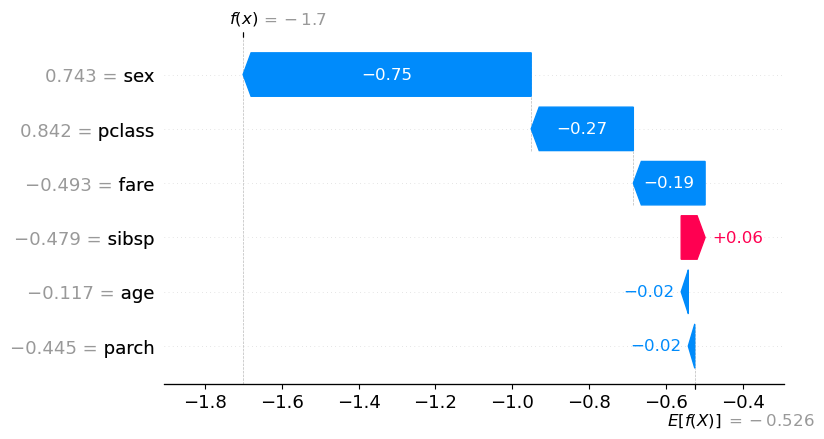

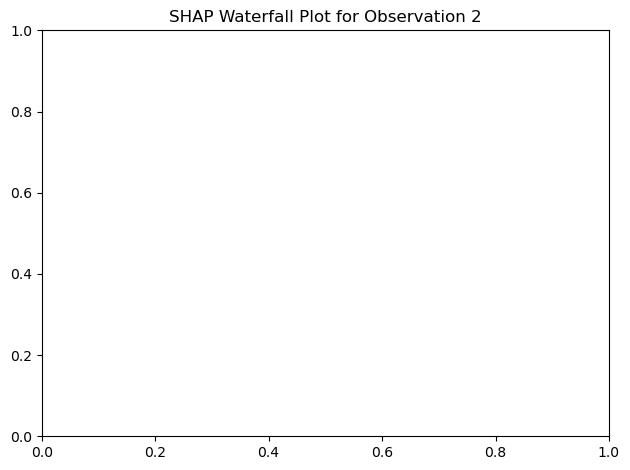

Значения признаков для выбранного наблюдения:
pclass    0.841916
sex       0.743497
age      -0.116523
sibsp    -0.479087
parch    -0.445000
fare     -0.493141
Name: 1155, dtype: float64

Предсказание модели для этого наблюдения: 0


In [14]:
import shap
import matplotlib.pyplot as plt

# Предполагается, что у вас уже есть обученная модель (model), 
# тестовые данные (X_test) и SHAP explainer (explainer)

# Вычисление SHAP values, если еще не вычислены
shap_values = explainer(X_test)

# Индекс наблюдения, которое мы хотим объяснить (например, первое наблюдение)
observation_index = 2

# Создание waterfall plot
plt.figure(figsize=(10, 8))
shap.plots.waterfall(shap_values[observation_index])
plt.title(f"SHAP Waterfall Plot for Observation {observation_index}")
plt.tight_layout()
plt.show()

# Если вы хотите увидеть значения признаков для этого наблюдения
print("Значения признаков для выбранного наблюдения:")
print(X_test.iloc[observation_index])

# Если вы хотите увидеть предсказание модели для этого наблюдения
prediction = model.predict(X_test.iloc[observation_index].to_frame().T)
print(f"\nПредсказание модели для этого наблюдения: {prediction[0]}")